In [3]:
import tensorflow as tf
import numpy as np

In [ ]:
#구글 코랩에서 로컬에서 데이터를 로드하는 코드
##from google.colab import files
##uploaded = files.upload()

Saving cat-01.jpg to cat-01.jpg
Saving cat-02.jpg to cat-02.jpg
Saving cat-03.jpg to cat-03.jpg
Saving dog-01.jpg to dog-01.jpg
Saving dog-02.jpg to dog-02.jpg
Saving dog-03.jpg to dog-03.jpg


In [1]:
#개와 고양이 사진 불러오기
#file_list = []
#for i in range(1,4):
#  file_list.append('cat-0%d.jpg'%i)
#  file_list.append('dog-0%d.jpg'%i)
#file_list=sorted(file_list)
import pathlib 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

img size:  (900, 1200, 3)
img size:  (900, 1200, 3)
img size:  (900, 742, 3)
img size:  (800, 1200, 3)
img size:  (800, 1200, 3)
img size:  (900, 1200, 3)


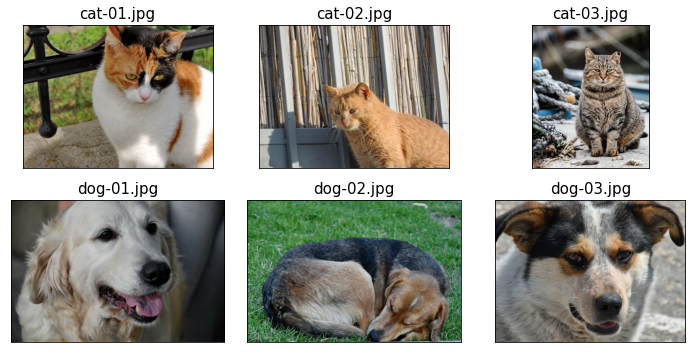

In [4]:
import matplotlib.pyplot as plt
import os
fig = plt.figure(figsize=(10,5))

for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('img size: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()

In [ ]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
labels

[0, 0, 0, 1, 1, 1]

In [ ]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))

In [ ]:
for item in ds_files_labels:
  print(item[0].numpy(), item[1].numpy())

b'cat-01.jpg' 0
b'cat-02.jpg' 0
b'cat-03.jpg' 0
b'dog-01.jpg' 1
b'dog-02.jpg' 1
b'dog-03.jpg' 1


In [ ]:
#이미지를 로드하고, 원본 데이터로 디코딩한 후, 원하는 크기로 변경
def load_and_preprocess(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [img_height, img_width])
  image /= 255.0
  return image, label

In [ ]:
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

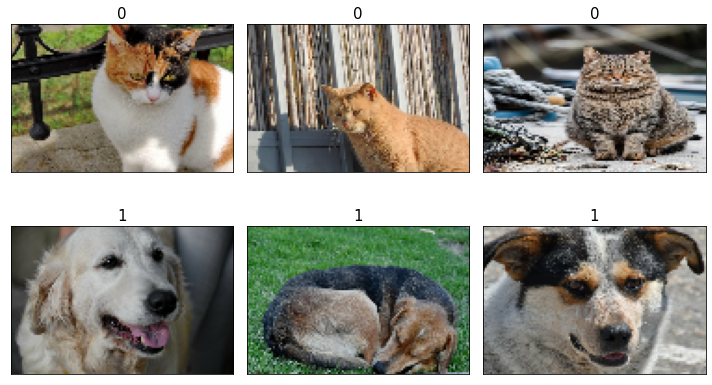

In [ ]:
#이미지들을 같은 크기로 변환
fig = plt.figure(figsize=(10,6))
for i, example in enumerate(ds_images_labels):
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(example[0])
  ax.set_title('{}'.format(example[1].numpy()), size=15)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
#텐서플로우의 datesets 라이브러리로 데이터셋을 불러올 수 있음
#데이터셋의 builder() 함수를 호출한 후, download_and_prepare() 메소드를 실행, 그 후, as_dataset() 메서드를 실행
celeba_bldr = tfds.builder('celeb_a')
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [30]:
#load() 함수를 이용하여 한번에 데이터셋을 로드할 수 있음
mnist, mnist_info = tfds.load('mnist', with_info = True, shuffle_files=False)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [34]:
print(mnist_info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [53]:
#훈련데이터에서 딕셔너리 원소를 튜플로 변환
ds_train = mnist['train']
ds_train = ds_train.map(lambda item: (item['image'], item['label']))

In [54]:
#batch 함수는 몇개씩 배치를 return할 것인지 설정, next(iter(dataset))으로 데이터셋의 다음 배치를 가져올 수 있음
ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

(10, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6], shape=(10,), dtype=int64)


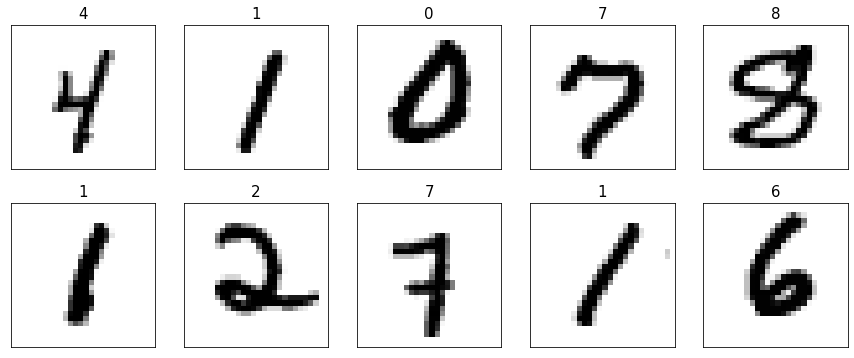

In [56]:
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(image[:, :, 0], cmap='gray_r')
  ax.set_title('{}'.format(label),size=15)
plt.show()

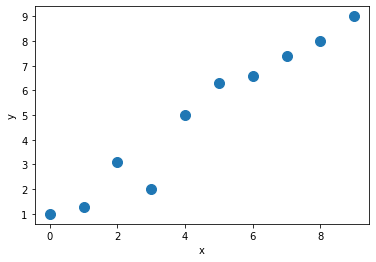

In [58]:
#선형 회귀 모델
x_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])
plt.plot(x_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [59]:
#특성을 표준화
x_train_norm = (x_train -np.mean(x_train))/np.std(x_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices((tf.cast(x_train_norm, tf.float32), tf.cast(y_train, tf.float32)))

In [60]:
#tf.keras.Model 클래스를 상속하여 모델을 만들 수 있음
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w = tf.Variable(0.0, name='weight')
    self.b = tf.Variable(0.0, name='bias')

  def call(self, x):
    return self.w*x + self.b

In [61]:
#summary함수를 사용하여 모델의 각 층의 구성 요소와 파라미터 개수를 확인할 수 있음. 그 전에 build함수를 통해 입력차원을 지정해줘야함,
#None으로 입력차원을 지정하면 임의의 배치 크기를 사용할 수 있음, 이와 같이 build 메서드로 모델 층과 파라미터를 만드는 방법을 변수 지연 생성이라 함.
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [62]:
#손실 함수로 평균 제곱 오차를 사용하고, 파라미터를 학습시키기 위해 확률적 경사 하강법을 사용
#gradienttape를 통해 각 변수에 대한 손실함수의 도함수를 알 수 있음.
def loss_fn(y_pred, y):
  return tf.reduce_mean(tf.square(y - y_pred))

def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss_fn(model(inputs), outputs)
  dw, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [63]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.01
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train)/batch_size))
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
ws, bs = [], []
for i, batch in enumerate(ds_train):
  if i >= steps_per_epoch * num_epochs:
    break
  ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  bx, by = batch
  loss_val = loss_fn(model(bx), by)

  train(model, bx, by, learning_rate=learning_rate)
  if i%log_steps==0:
    print('epoch {:3d} step {:4d} loss{:6.4f}'.format(int(i/steps_per_epoch), i, loss_val))

epoch   0 step    0 loss43.5600
epoch  10 step  100 loss0.1338
epoch  20 step  200 loss0.1086
epoch  30 step  300 loss0.0350
epoch  40 step  400 loss0.2519
epoch  50 step  500 loss0.2526
epoch  60 step  600 loss0.0745
epoch  70 step  700 loss0.0703
epoch  80 step  800 loss0.7464
epoch  90 step  900 loss2.4352
epoch 100 step 1000 loss0.2374
epoch 110 step 1100 loss0.1378
epoch 120 step 1200 loss0.0057
epoch 130 step 1300 loss0.0719
epoch 140 step 1400 loss0.0432
epoch 150 step 1500 loss0.0666
epoch 160 step 1600 loss0.2519
epoch 170 step 1700 loss2.4374
epoch 180 step 1800 loss0.0716
epoch 190 step 1900 loss0.2510


In [64]:
print('final parameter: ', model.w.numpy(), model.b.numpy())

final parameter:  2.7009296 4.973011


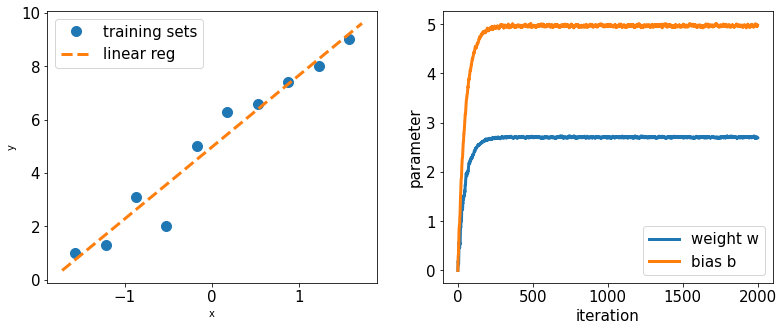

In [67]:
#선형 회귀로 예측한 결과와, 훈련 횟수에 따른 파라미터들의 값을 시각화
x_test = np.linspace(0, 9, num=100).reshape(-1,1)
x_test_norm = (x_test - np.mean(x_test)) / np.std(x_test)
y_pred = model(tf.cast(x_test_norm, dtype=tf.float32))
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(x_train_norm, y_train, 'o', markersize=10)
plt.plot(x_test_norm, y_pred, '--', lw=3)
plt.legend(['training sets', 'linear reg'], fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1,2,2)
plt.plot(ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['weight w', 'bias b'], fontsize=15)
ax.set_xlabel('iteration', size=15)
ax.set_ylabel('parameter', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [68]:
#손실 함수와 최적화 메소드는 keras에도 구현되어있음
model = MyModel()
model.compile(optimizer='sgd', loss=loss_fn, metrics=['mae', 'mse'])

In [69]:
#numpy배열도 매개변수로 전달할 수 있음
model.fit(x_train_norm, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
10/10 [==============================] - 1s 2ms/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 2ms/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10 [==

In [70]:
#붓꽃 데이터셋을 분류하는 다층 퍼셉트론을 만들기 위헤 데이터셋을 불러옴
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/iris/2.0.0.incompleteOZN6SW/iris-train.tfrecord


  0%|          | 0/150 [00:00<?, ? examples/s]

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    version=2.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.',
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "Dua, D

In [72]:
#shuffle 함수는 데이터셋을 섞어줌, 이때 첫번째 인자는 buffer_size임. buffer_size는 batchsize보다 커야함
#take함수는 인자로 주어진 횟수만큼 batch를 리턴함. 이때 batchsize를 batch()로 설정해주지 않았기 때문에 배치 사이즈는 default=1이 됨.
#skip은 주어진 인자만큼의 데이터를 스킵한 dataset을 리턴. 즉 skip(100)을 하면 101번째 데이터부터 시작하는 데이터셋을 리턴 
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

In [73]:
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))

In [75]:
#케라스에선 Sequential 클래스를 사용해 여러개의 층을 쌓아 신경망을 만들 수 있음
#Dense 클래스는 완전 연결 층, 또는 선형 층이라고 불림. 이 층은 f(wx+b)의 꼴임
#아래는 4개의 특성을 입력받아 16개의 뉴런으로 이루어진 층에 주입함. 
#주입받은 층은 iris 데이터셋의 label이 3개이므로 softmax activation 함수를 사용해서 3개의 클래스 중 가장 높은 확률의 클래스를 예측함
#각 층의 파라미터의 개수는 (입력 유닛의 수 + 1) * 출력 유닛의 수
iris_model = tf.keras.Sequential([
                                  tf.keras.layers.Dense(16, activation='sigmoid', name='fc1', input_shape=(4,)),
                                  tf.keras.layers.Dense(3, name='fc2', activation='softmax')
])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [76]:
iris_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [80]:
#repeat함수는 데이터셋이 반복되도록 하게 하고, batch 함수는 배치 사이즈를 설정해줌.
#prefech는 버퍼 사이즈만큼의 값을 현재 값들이 진행되고 있을 때, 미리 fetch하도록 하는데 이는 throughput을 향상시킴
n_epochs = 100
train_size = 100
batch_size = 2
steps_per_epochs = np.ceil(train_size/batch_size)
ds_train = ds_train_orig.shuffle(buffer_size = train_size)
ds_train = ds_train.repeat().batch(batch_size = batch_size).prefetch(buffer_size=1000)
history = iris_model.fit(ds_train, epochs=n_epochs, steps_per_epoch = steps_per_epochs, verbose=0)

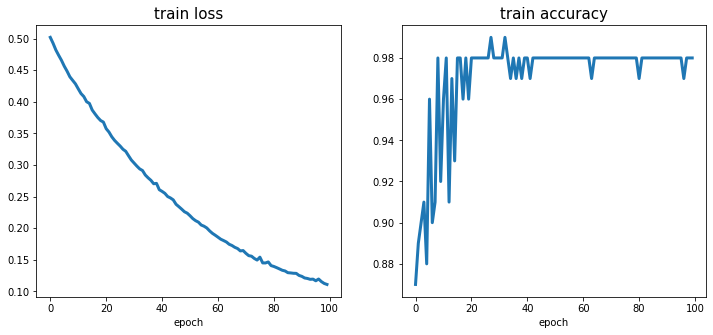

In [81]:
hist = history.history
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(hist['loss'], lw=3)
ax.set_title('train loss', size=15)
ax.set_xlabel('epoch')
ax.tick_params(axis='both', which='major')
ax = fig.add_subplot(1,2,2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('train accuracy', size=15)
ax.set_xlabel('epoch')
ax.tick_params(axis='both', which='major')
plt.show()

In [83]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('test loss: %.4f, test accuracy: %.4f' %(results[0], results[1]))

test loss: 0.1439, test accuracy: 0.9400


In [84]:
#iris_model.save('iris-classifier.h5', overwrite=True, include_optimizer=True, save_format='h5')
#위와 같이 모델 구조와 학습된 파라미터를 저장할 수 있음. 신경망 구조만 저장하고 싶다면, .to_json() 메소드를 사용하면 됨
#모델 가중치만 저장하고 싶다면 .save_weights() 메소드를 사용하면 됨.
#모델을 저장하기 위해선 아래와 같이 load_model() 메소드를 사용하면 됨
#iris_model = tf.keras.models.load_model('iris-classifier.h5')

In [88]:
#케라스에선 콜백 객체를 이용하여 모델의 훈련과정을 제어할 수 있음. 
#ModelCheckPoint 객체를 이용하여 최고의 성능을 내는 가중치를 저장할 수 있고, EarlyStopping 객체를 이용하여 매개변수로 준 patience 동안의 에포크동안 검증 손실이 감소하지 않으면 훈련을 멈춤
#이러한 콜백 객체들로 이루어진 리스트를 fit 메소드를 실행할 때, callbacks 인자로 주면 됨.
#또한, 텐서보드를 이용하여 모델의 학습과정과 계산 그래프까지 시각화할 수 있음
from tensorflow.keras.callbacks import TensorBoard
callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='iris-earlystopping.h5', monitor='val_loss'), 
                 tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
model = tf.keras.models.model_from_json(iris_model.to_json())
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(ds_train, epochs=500, steps_per_epoch = steps_per_epochs, validation_data=ds_test.batch(50), callbacks=callback_list, verbose=0)

In [91]:
#%load_ext tensorboard
#%tensorboard --logdir logs --port 6006
#jupyter notebook에서 위의 코드를 통해 텐서보드를 포함시킬 수 있음